In [5]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sys 
import os

In [6]:
def get_dataframe(network):   
    gpus = ["p100","p40","k80","k40m","m60","m40"]
    batch_size = ["1","2","4","8","16","32","64","128","256"]
    df = pd.DataFrame(index=batch_size)
    df['batch'] = batch_size
    for gpu in gpus: 
        df[gpu] = batch_size
    for batch in batch_size: 
        #print("Batch Size: "+batch)
        for gpu in gpus:
            gpu_file = pd.read_csv(network+'/batch_'+batch+'/fixed_nvidia-smi-'+gpu+'_'+network+'.csv')    
            #print (network+'/batch_'+batch+'nvidia-smi-'+gpu+'_'+network+'.csv')
            gpu_file[' memory.used [MiB]'] = gpu_file[' memory.used [MiB]'].map(lambda x: str(x)[:-4])
            gpu_file[' memory.total [MiB]'] = gpu_file[' memory.total [MiB]'].map(lambda x: str(x)[:-4])
            gpu_file[' memory.free [MiB]'] = gpu_file[' memory.free [MiB]'].map(lambda x: str(x)[:-4])
            gpu_file[' memory.used [MiB]'].astype(str)
            gpu_file.to_csv('tmp.csv')   
            gpu_file = pd.read_csv('tmp.csv')
            df[gpu][batch] = gpu_file[' memory.used [MiB]'].mean()
            #print(gpu)
            #print(gpu_file[' memory.used [MiB]'].mean())    
            
    df.head()
    return df


In [12]:
def create_graph(df, title):
    colors = {"p100":"blue","p40":"red","k80":"green","k40m":"teal","m60":"black","m40":"purple"}
    # Setting the positions and width for the bars
    pos = list(range(len(df['p100'])))
    width = 0.10

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with pre_score data,
    # in position pos,
    plt.bar(pos,
        #using df['pre_score'] data,
        df['p100'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='blue',
        # with label the first value in first_name
        label=df['batch'][0])

    # Create a bar with mid_score data,
    # in position pos + some width buffer,
    plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        df['p40'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='red',
        # with label the second value in first_name
        label=df['batch'][1])

    # Create a bar with post_score data,
    # in position pos + some width buffer,
    plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        df['m60'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='teal',
        # with label the third value in first_name
        label=df['batch'][2])

    # Create a bar with post_score data,
    # in position pos + some width buffer,
    plt.bar([p + width*3 for p in pos],
        #using df['post_score'] data,
        df['m40'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='pink',
        # with label the third value in first_name
        label=df['batch'][3])

    # Create a bar with post_score data,
    # in position pos + some width buffer,
    plt.bar([p + width*4 for p in pos],
        #using df['post_score'] data,
        df['k80'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='yellow',
        # with label the third value in first_name
        label=df['batch'][4])

    # Create a bar with post_score data,
    # in position pos + some width buffer,
    plt.bar([p + width*5 for p in pos],
        #using df['post_score'] data,
        df['k40m'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='purple',
        # with label the third value in first_name
        label=df['batch'][5])

    # Create a bar with post_score data
    # Set the y axis label
    ax.set_ylabel('Memory Usage [MiB]')
    ax.set_xlabel('Batch Size')
    # Set the chart's title
    ax.set_title('MXNET: Average Memory Usage of each GPU for '+title)

    # Set the position of the x ticks
    ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
    ax.set_xticklabels(df['batch'])

    # Setting the x-axis and y-axis limits
    plt.xlim(min(pos)-width, max(pos)+width*7)
    plt.ylim([0, 25000])

    # Adding the legend and showing the plot
    plt.legend(['P100', 'P40', 'M60', 'M40', 'K80', 'K40m'], loc='upper left')
    plt.grid()
    plt.show()
    #plt.savefig(network+'_memory_usage.png')

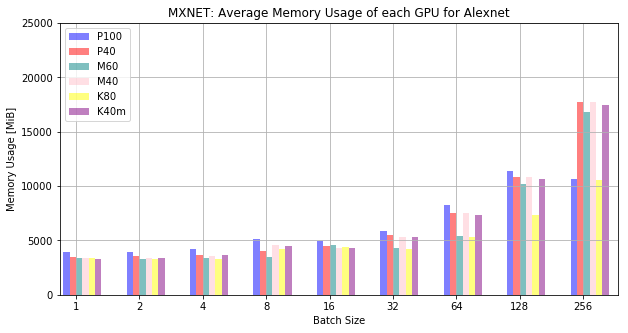

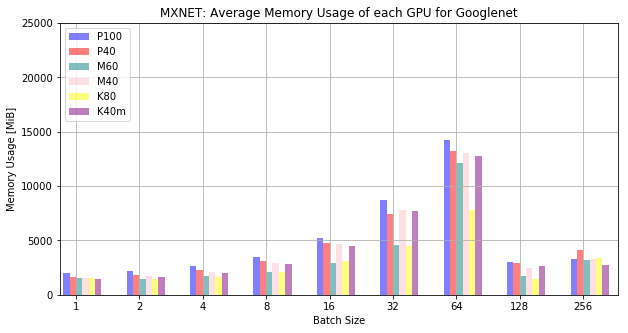

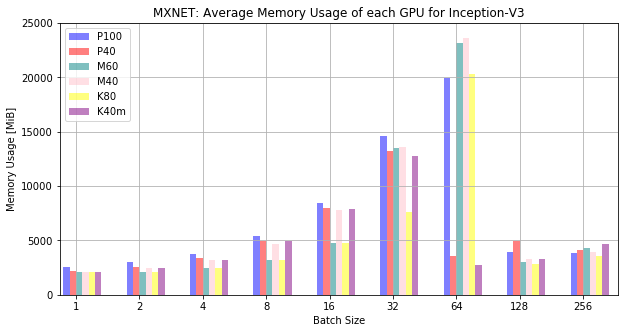

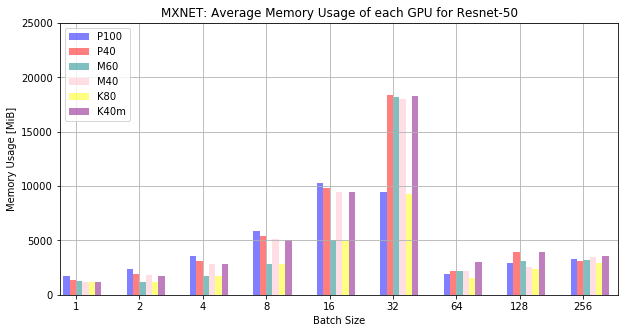

In [13]:
networks = ["alexnet", "googlenet", "inception-v3", "resnet-50"]
titles =  ["Alexnet", "Googlenet", "Inception-V3", "Resnet-50"]

for network, title in zip(networks, titles): 
    df = get_dataframe(network)
    create_graph(df, title)
